In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
env_name = 'CustomPendulum-v0'

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4


In [2]:
env = gym.make(env_name)


seed = 0
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

# print(np.random.randn())
# print(torch.randn(1))

c = 0.21455680991172585
2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_pendulum_mdp_", evaluate=True)
# print(np.random.randn())
# print(torch.randn(1))

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data.pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info.pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {"offline_data": offline_data,
             "s_dim": s_dim,
             "a_dim": a_dim,
             "z_dim": z_dim,
#              "policy":agent.select_action,
             "mdp_policy":agent.policy.my_np_select_action,
             "bamdp_policy":None,
             "debug_info":debug_info,
             "env" : env}

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())
# print(torch.randn(1))

In [7]:
vi.get_real_rollout_mdppolicy_data()

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

0  c = 0.16346495489906906
1  c = 0.175923049855898
2  c = 0.213101048692264
3  c = 0.14501806056071762
4  c = 0.004052611988015664
5  c = 0.120134560420777
6  c = 0.25697024030079035
7  c = 0.09642657758269942
8  c = 0.05526129195564814
9  c = 0.11417486037608537
10  c = 0.25864988011260814
11  c = 0.020876132555705383
12  c = 0.2613891486606151
13  c = 0.10624180953664825
14  c = 0.03203027777652895
15  c = 0.1622476552961531
16  c = 0.1618277342655034
17  c = 0.055320312028603325
18  c = 0.09391364165595244
19  c = 0.11885913261799258
20  c = 0.11403897859981632
21  c = 0.09912067121474619
22  c = 0.06488189030041151
23  c = 0.03506631058301788
24  c = 0.19965083813641546
25  c = 0.08571604451747712
26  c = 0.1514796791677473
27  c = 0.04546713757372708
28  c = 0.13733918450179566
29  c = 0.1522597624567635
30  c = 0.02389789952996266
31  c = 0.0638122346167221
32  c = 0.28146488121321594
33  c = 0.2259386184773079
34  c = 0.28977259206899
35  c = 0.15402135084365112
36  c = 0.14479

tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

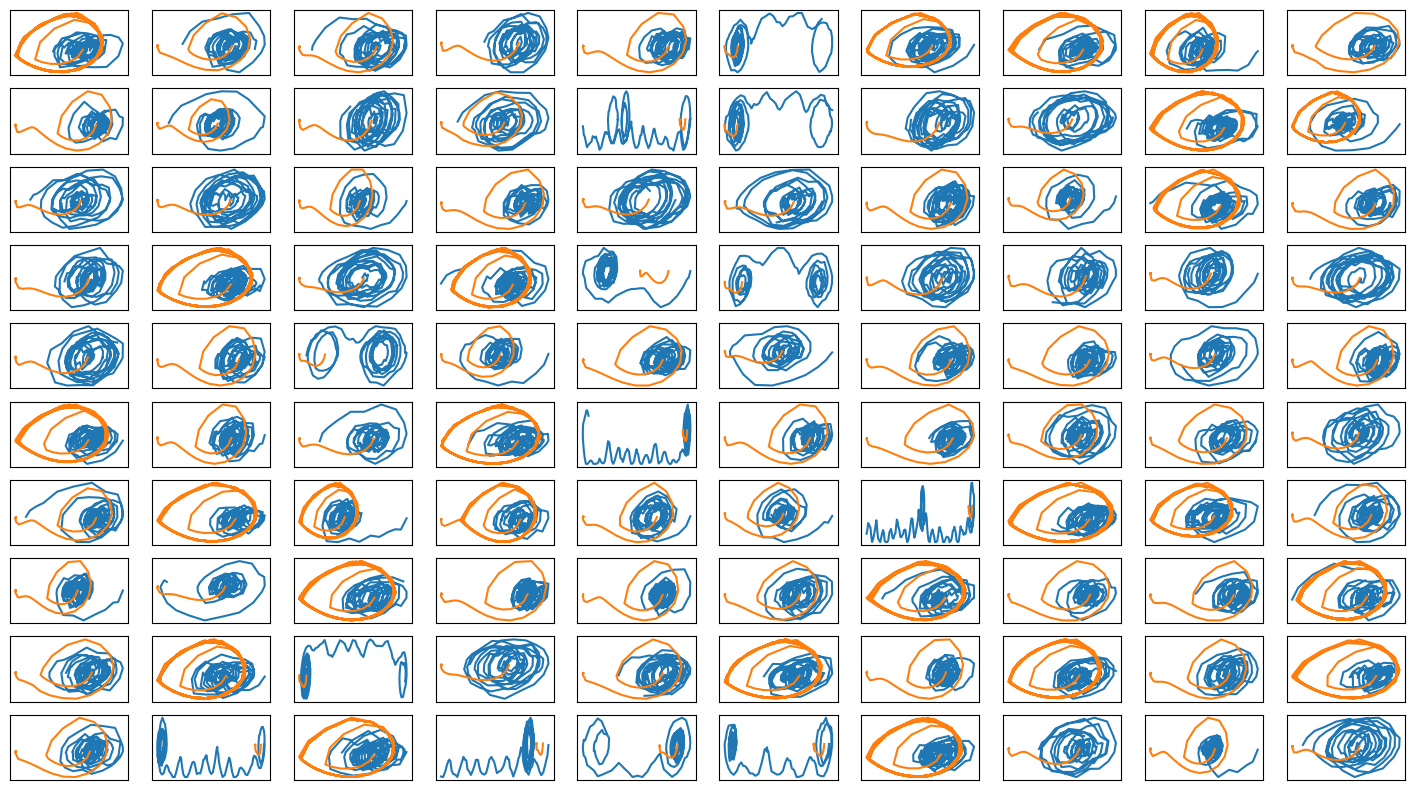

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

train_weighted_vae: enc_dec
train: iter 0  trainloss 1607392.38277  validloss 1491.04003±0.00000  bestvalidloss 1491.04003  last_update 0
train: iter 1  trainloss 606.12387  validloss 485.96077±0.00000  bestvalidloss 485.96077  last_update 0
train: iter 2  trainloss 490.11660  validloss 477.82732±0.00000  bestvalidloss 477.82732  last_update 0
train: iter 3  trainloss 474.13300  validloss 476.91622±0.00000  bestvalidloss 476.91622  last_update 0
train: iter 4  trainloss 462.92298  validloss 464.36157±0.00000  bestvalidloss 464.36157  last_update 0
train: iter 5  trainloss 491.01831  validloss 451.41208±0.00000  bestvalidloss 451.41208  last_update 0
train: iter 6  trainloss 457.60271  validloss 445.39574±0.00000  bestvalidloss 445.39574  last_update 0
train: iter 7  trainloss 460.50418  validloss 442.08346±0.00000  bestvalidloss 442.08346  last_update 0
train: iter 8  trainloss 442.86573  validloss 439.78797±0.00000  bestvalidloss 439.78797  last_update 0
train: iter 9  trainloss 452.1

train: iter 78  trainloss -150.46997  validloss -129.59555±0.00000  bestvalidloss -129.59555  last_update 0
train: iter 79  trainloss -162.13284  validloss -146.42944±0.00000  bestvalidloss -146.42944  last_update 0
train: iter 80  trainloss -173.49956  validloss -152.54004±0.00000  bestvalidloss -152.54004  last_update 0
train: iter 81  trainloss -177.36959  validloss -132.45226±0.00000  bestvalidloss -152.54004  last_update 1
train: iter 82  trainloss -187.55441  validloss -173.09803±0.00000  bestvalidloss -173.09803  last_update 0
train: iter 83  trainloss -197.34882  validloss -106.11164±0.00000  bestvalidloss -173.09803  last_update 1
train: iter 84  trainloss -210.48621  validloss -161.06683±0.00000  bestvalidloss -173.09803  last_update 2
train: iter 85  trainloss -208.66508  validloss -181.51366±0.00000  bestvalidloss -181.51366  last_update 0
train: iter 86  trainloss -223.05861  validloss -194.17103±0.00000  bestvalidloss -194.17103  last_update 0
train: iter 87  trainloss -2

train: iter 154  trainloss -569.50908  validloss -510.88160±0.00000  bestvalidloss -539.84043  last_update 3
train: iter 155  trainloss -570.74522  validloss -553.80489±0.00000  bestvalidloss -553.80489  last_update 0
train: iter 156  trainloss -571.72061  validloss -519.14045±0.00000  bestvalidloss -553.80489  last_update 1
train: iter 157  trainloss -564.99775  validloss -561.61271±0.00000  bestvalidloss -561.61271  last_update 0
train: iter 158  trainloss -564.39744  validloss -557.27854±0.00000  bestvalidloss -561.61271  last_update 1
train: iter 159  trainloss -579.49554  validloss -550.10255±0.00000  bestvalidloss -561.61271  last_update 2
train: iter 160  trainloss -578.63849  validloss -542.33225±0.00000  bestvalidloss -561.61271  last_update 3
train: iter 161  trainloss -584.73617  validloss -549.01946±0.00000  bestvalidloss -561.61271  last_update 4
train: iter 162  trainloss -593.68198  validloss -558.71596±0.00000  bestvalidloss -561.61271  last_update 5
train: iter 163  tr

train: iter 230  trainloss -647.94287  validloss -626.56720±0.00000  bestvalidloss -631.17452  last_update 18
train: iter 231  trainloss -636.97892  validloss -559.71491±0.00000  bestvalidloss -631.17452  last_update 19
train: iter 232  trainloss -643.91101  validloss -594.71771±0.00000  bestvalidloss -631.17452  last_update 20
train: iter 233  trainloss -640.56649  validloss -621.24714±0.00000  bestvalidloss -631.17452  last_update 21
train: iter 234  trainloss -653.11425  validloss -595.65251±0.00000  bestvalidloss -631.17452  last_update 22
train: iter 235  trainloss -661.74059  validloss -604.03484±0.00000  bestvalidloss -631.17452  last_update 23
train: iter 236  trainloss -649.46475  validloss -594.26110±0.00000  bestvalidloss -631.17452  last_update 24
train: iter 237  trainloss -658.93215  validloss -600.62661±0.00000  bestvalidloss -631.17452  last_update 25
train: iter 238  trainloss -663.95652  validloss -591.21494±0.00000  bestvalidloss -631.17452  last_update 26
train: ite

train: iter 305  trainloss -646.04214  validloss -654.14481±0.00000  bestvalidloss -672.81595  last_update 8
train: iter 306  trainloss -636.56554  validloss -620.45829±0.00000  bestvalidloss -672.81595  last_update 9
train: iter 307  trainloss -670.35752  validloss -624.31361±0.00000  bestvalidloss -672.81595  last_update 10
train: iter 308  trainloss -680.04707  validloss -629.51389±0.00000  bestvalidloss -672.81595  last_update 11
train: iter 309  trainloss -692.00204  validloss -674.86099±0.00000  bestvalidloss -674.86099  last_update 0
train: iter 310  trainloss -698.01048  validloss -650.38831±0.00000  bestvalidloss -674.86099  last_update 1
train: iter 311  trainloss -692.56842  validloss -673.41184±0.00000  bestvalidloss -674.86099  last_update 2
train: iter 312  trainloss -657.08807  validloss -657.79889±0.00000  bestvalidloss -674.86099  last_update 3
train: iter 313  trainloss -657.00840  validloss -650.76211±0.00000  bestvalidloss -674.86099  last_update 4
train: iter 314  

train: iter 380  trainloss -686.72509  validloss -550.04724±0.00000  bestvalidloss -674.86099  last_update 71
train: iter 381  trainloss -686.61530  validloss -522.78551±0.00000  bestvalidloss -674.86099  last_update 72
train: iter 382  trainloss -691.38388  validloss -531.41898±0.00000  bestvalidloss -674.86099  last_update 73
train: iter 383  trainloss -687.15510  validloss -588.16513±0.00000  bestvalidloss -674.86099  last_update 74
train: iter 384  trainloss -698.15003  validloss -656.31529±0.00000  bestvalidloss -674.86099  last_update 75
train: iter 385  trainloss -681.53840  validloss -661.47104±0.00000  bestvalidloss -674.86099  last_update 76
train: iter 386  trainloss -693.50625  validloss -639.54771±0.00000  bestvalidloss -674.86099  last_update 77
train: iter 387  trainloss -695.61247  validloss -592.85360±0.00000  bestvalidloss -674.86099  last_update 78
train: iter 388  trainloss -698.75483  validloss -652.35528±0.00000  bestvalidloss -674.86099  last_update 79
train: ite

train: iter 455  trainloss -700.73216  validloss -635.52388±0.00000  bestvalidloss -682.43976  last_update 61
train: iter 456  trainloss -712.76776  validloss -623.26913±0.00000  bestvalidloss -682.43976  last_update 62
train: iter 457  trainloss -704.61886  validloss -598.61100±0.00000  bestvalidloss -682.43976  last_update 63
train: iter 458  trainloss -714.86720  validloss -628.24084±0.00000  bestvalidloss -682.43976  last_update 64
train: iter 459  trainloss -712.13741  validloss -682.47480±0.00000  bestvalidloss -682.47480  last_update 0
train: iter 460  trainloss -714.27941  validloss -659.10128±0.00000  bestvalidloss -682.47480  last_update 1
train: iter 461  trainloss -695.32211  validloss -606.24797±0.00000  bestvalidloss -682.47480  last_update 2
train: iter 462  trainloss -718.92196  validloss -618.77664±0.00000  bestvalidloss -682.47480  last_update 3
train: iter 463  trainloss -667.61015  validloss -669.31857±0.00000  bestvalidloss -682.47480  last_update 4
train: iter 464

train: iter 532  trainloss -706.46839  validloss -694.08476±0.00000  bestvalidloss -699.57894  last_update 2
train: iter 533  trainloss -707.68749  validloss -642.60955±0.00000  bestvalidloss -699.57894  last_update 3
train: iter 534  trainloss -702.73682  validloss -661.34125±0.00000  bestvalidloss -699.57894  last_update 4
train: iter 535  trainloss -725.45625  validloss -673.65691±0.00000  bestvalidloss -699.57894  last_update 5
train: iter 536  trainloss -710.20158  validloss -644.83958±0.00000  bestvalidloss -699.57894  last_update 6
train: iter 537  trainloss -718.24483  validloss -657.50206±0.00000  bestvalidloss -699.57894  last_update 7
train: iter 538  trainloss -730.72703  validloss -690.71008±0.00000  bestvalidloss -699.57894  last_update 8
train: iter 539  trainloss -673.38805  validloss -611.37612±0.00000  bestvalidloss -699.57894  last_update 9
train: iter 540  trainloss -720.62095  validloss -655.69440±0.00000  bestvalidloss -699.57894  last_update 10
train: iter 541  t

train: iter 609  trainloss -732.15112  validloss -688.60379±0.00000  bestvalidloss -699.57894  last_update 79
train: iter 610  trainloss -720.10046  validloss -642.39813±0.00000  bestvalidloss -699.57894  last_update 80
train: iter 611  trainloss -739.53246  validloss -686.27225±0.00000  bestvalidloss -699.57894  last_update 81
train: iter 612  trainloss -710.67601  validloss -650.34874±0.00000  bestvalidloss -699.57894  last_update 82
train: iter 613  trainloss -699.03728  validloss -650.41660±0.00000  bestvalidloss -699.57894  last_update 83
train: iter 614  trainloss -716.95069  validloss -678.52726±0.00000  bestvalidloss -699.57894  last_update 84
train: iter 615  trainloss -739.81890  validloss -661.98038±0.00000  bestvalidloss -699.57894  last_update 85
train: iter 616  trainloss -737.82525  validloss -682.48911±0.00000  bestvalidloss -699.57894  last_update 86
train: iter 617  trainloss -648.78774  validloss -687.51336±0.00000  bestvalidloss -699.57894  last_update 87
train: ite

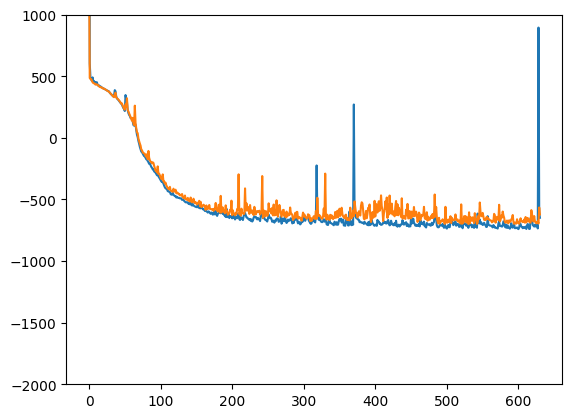

train_weighted_vae: enc
train: iter 0  trainloss -727.25381  validloss -696.23878±0.00000  bestvalidloss -696.23878  last_update 0
train: iter 1  trainloss -736.27992  validloss -700.09414±0.00000  bestvalidloss -700.09414  last_update 0
train: iter 2  trainloss -715.59150  validloss -687.33528±0.00000  bestvalidloss -700.09414  last_update 1
train: iter 3  trainloss -742.59048  validloss -696.99016±0.00000  bestvalidloss -700.09414  last_update 2
train: iter 4  trainloss -737.85302  validloss -698.82856±0.00000  bestvalidloss -700.09414  last_update 3
train: iter 5  trainloss -738.73720  validloss -686.85037±0.00000  bestvalidloss -700.09414  last_update 4
train: iter 6  trainloss -706.05454  validloss -698.39865±0.00000  bestvalidloss -700.09414  last_update 5
train: iter 7  trainloss -738.02735  validloss -661.61904±0.00000  bestvalidloss -700.09414  last_update 6
train: iter 8  trainloss -710.23649  validloss -690.33778±0.00000  bestvalidloss -700.09414  last_update 7
train: iter 9

train: iter 76  trainloss -732.85311  validloss -662.41292±0.00000  bestvalidloss -701.31816  last_update 4
train: iter 77  trainloss -741.50009  validloss -695.10429±0.00000  bestvalidloss -701.31816  last_update 5
train: iter 78  trainloss -742.58229  validloss -691.42755±0.00000  bestvalidloss -701.31816  last_update 6
train: iter 79  trainloss -743.73442  validloss -700.42330±0.00000  bestvalidloss -701.31816  last_update 7
train: iter 80  trainloss -744.61169  validloss -701.19379±0.00000  bestvalidloss -701.31816  last_update 8
train: iter 81  trainloss -733.34508  validloss -687.16560±0.00000  bestvalidloss -701.31816  last_update 9
train: iter 82  trainloss -728.00157  validloss -688.89577±0.00000  bestvalidloss -701.31816  last_update 10
train: iter 83  trainloss -736.38231  validloss -681.95791±0.00000  bestvalidloss -701.31816  last_update 11
train: iter 84  trainloss -723.64399  validloss -687.05401±0.00000  bestvalidloss -701.31816  last_update 12
train: iter 85  trainloss

train: iter 151  trainloss -733.35964  validloss -631.12837±0.00000  bestvalidloss -703.29503  last_update 66
train: iter 152  trainloss -736.79938  validloss -664.22319±0.00000  bestvalidloss -703.29503  last_update 67
train: iter 153  trainloss -732.75722  validloss -653.79398±0.00000  bestvalidloss -703.29503  last_update 68
train: iter 154  trainloss -732.36776  validloss -624.32986±0.00000  bestvalidloss -703.29503  last_update 69
train: iter 155  trainloss -727.55564  validloss -636.28261±0.00000  bestvalidloss -703.29503  last_update 70
train: iter 156  trainloss -722.11371  validloss -606.23110±0.00000  bestvalidloss -703.29503  last_update 71
train: iter 157  trainloss -744.08164  validloss -647.28442±0.00000  bestvalidloss -703.29503  last_update 72
train: iter 158  trainloss -736.50932  validloss -649.23698±0.00000  bestvalidloss -703.29503  last_update 73
train: iter 159  trainloss -744.44921  validloss -632.69455±0.00000  bestvalidloss -703.29503  last_update 74
train: ite

train: iter 40  trainloss -693.96870  validloss -699.79410±0.00000  bestvalidloss -707.36611  last_update 2
train: iter 41  trainloss -710.52212  validloss -660.60539±0.00000  bestvalidloss -707.36611  last_update 3
train: iter 42  trainloss -725.31365  validloss -678.42024±0.00000  bestvalidloss -707.36611  last_update 4
train: iter 43  trainloss -718.48365  validloss -676.64867±0.00000  bestvalidloss -707.36611  last_update 5
train: iter 44  trainloss -721.32512  validloss -647.97756±0.00000  bestvalidloss -707.36611  last_update 6
train: iter 45  trainloss -717.16810  validloss -696.32386±0.00000  bestvalidloss -707.36611  last_update 7
train: iter 46  trainloss -735.36136  validloss -693.44568±0.00000  bestvalidloss -707.36611  last_update 8
train: iter 47  trainloss -731.13793  validloss -688.78862±0.00000  bestvalidloss -707.36611  last_update 9
train: iter 48  trainloss -732.28377  validloss -686.17587±0.00000  bestvalidloss -707.36611  last_update 10
train: iter 49  trainloss -

train: iter 116  trainloss -750.58570  validloss -683.01548±0.00000  bestvalidloss -715.85932  last_update 9
train: iter 117  trainloss -700.81755  validloss -715.69885±0.00000  bestvalidloss -715.85932  last_update 10
train: iter 118  trainloss -719.64958  validloss -660.84884±0.00000  bestvalidloss -715.85932  last_update 11
train: iter 119  trainloss -733.63719  validloss -683.17301±0.00000  bestvalidloss -715.85932  last_update 12
train: iter 120  trainloss -732.14476  validloss -698.98370±0.00000  bestvalidloss -715.85932  last_update 13
train: iter 121  trainloss -750.05158  validloss -704.79248±0.00000  bestvalidloss -715.85932  last_update 14
train: iter 122  trainloss -736.69189  validloss -705.18791±0.00000  bestvalidloss -715.85932  last_update 15
train: iter 123  trainloss -750.43668  validloss -685.80051±0.00000  bestvalidloss -715.85932  last_update 16
train: iter 124  trainloss -750.96517  validloss -713.98283±0.00000  bestvalidloss -715.85932  last_update 17
train: iter

train: iter 193  trainloss -740.12185  validloss -708.23295±0.00000  bestvalidloss -716.50497  last_update 1
train: iter 194  trainloss -750.08538  validloss -707.53035±0.00000  bestvalidloss -716.50497  last_update 2
train: iter 195  trainloss -744.05189  validloss -717.11587±0.00000  bestvalidloss -717.11587  last_update 0
train: iter 196  trainloss -728.93626  validloss -685.08376±0.00000  bestvalidloss -717.11587  last_update 1
train: iter 197  trainloss -741.91254  validloss -709.09456±0.00000  bestvalidloss -717.11587  last_update 2
train: iter 198  trainloss -752.17641  validloss -681.95792±0.00000  bestvalidloss -717.11587  last_update 3
train: iter 199  trainloss -760.04876  validloss -684.69476±0.00000  bestvalidloss -717.11587  last_update 4
train: iter 200  trainloss -756.44041  validloss -713.80588±0.00000  bestvalidloss -717.11587  last_update 5
train: iter 201  trainloss -728.14867  validloss -711.65564±0.00000  bestvalidloss -717.11587  last_update 6
train: iter 202  tr

train: iter 268  trainloss -760.21563  validloss -710.49614±0.00000  bestvalidloss -722.84262  last_update 58
train: iter 269  trainloss -759.54080  validloss -725.08404±0.00000  bestvalidloss -725.08404  last_update 0
train: iter 270  trainloss -754.01479  validloss -713.28962±0.00000  bestvalidloss -725.08404  last_update 1
train: iter 271  trainloss -728.33814  validloss -705.50323±0.00000  bestvalidloss -725.08404  last_update 2
train: iter 272  trainloss -734.12465  validloss -679.44392±0.00000  bestvalidloss -725.08404  last_update 3
train: iter 273  trainloss -738.82932  validloss -707.55338±0.00000  bestvalidloss -725.08404  last_update 4
train: iter 274  trainloss -733.62488  validloss -707.53137±0.00000  bestvalidloss -725.08404  last_update 5
train: iter 275  trainloss -746.20886  validloss -688.19429±0.00000  bestvalidloss -725.08404  last_update 6
train: iter 276  trainloss -746.18870  validloss -719.09631±0.00000  bestvalidloss -725.08404  last_update 7
train: iter 277  t

train: iter 344  trainloss -751.83703  validloss -713.49302±0.00000  bestvalidloss -726.56865  last_update 16
train: iter 345  trainloss -752.64496  validloss -701.80018±0.00000  bestvalidloss -726.56865  last_update 17
train: iter 346  trainloss -739.42308  validloss -718.15557±0.00000  bestvalidloss -726.56865  last_update 18
train: iter 347  trainloss -751.19686  validloss -700.31735±0.00000  bestvalidloss -726.56865  last_update 19
train: iter 348  trainloss -755.06878  validloss -693.14031±0.00000  bestvalidloss -726.56865  last_update 20
train: iter 349  trainloss -764.02860  validloss -719.34353±0.00000  bestvalidloss -726.56865  last_update 21
train: iter 350  trainloss -755.76245  validloss -716.89597±0.00000  bestvalidloss -726.56865  last_update 22
train: iter 351  trainloss -689.99783  validloss -719.59980±0.00000  bestvalidloss -726.56865  last_update 23
train: iter 352  trainloss -724.22917  validloss -678.31710±0.00000  bestvalidloss -726.56865  last_update 24
train: ite

train: iter 419  trainloss -753.53686  validloss -716.85773±0.00000  bestvalidloss -733.84640  last_update 10
train: iter 420  trainloss -757.87089  validloss -725.33731±0.00000  bestvalidloss -733.84640  last_update 11
train: iter 421  trainloss -762.77943  validloss -727.97952±0.00000  bestvalidloss -733.84640  last_update 12
train: iter 422  trainloss -767.31211  validloss -721.69942±0.00000  bestvalidloss -733.84640  last_update 13
train: iter 423  trainloss -760.36731  validloss -702.96716±0.00000  bestvalidloss -733.84640  last_update 14
train: iter 424  trainloss -770.38480  validloss -716.95367±0.00000  bestvalidloss -733.84640  last_update 15
train: iter 425  trainloss -765.49805  validloss -718.00741±0.00000  bestvalidloss -733.84640  last_update 16
train: iter 426  trainloss -492.73954  validloss -725.80319±0.00000  bestvalidloss -733.84640  last_update 17
train: iter 427  trainloss -729.52366  validloss -676.55746±0.00000  bestvalidloss -733.84640  last_update 18
train: ite

train: iter 494  trainloss -708.26903  validloss -720.94938±0.00000  bestvalidloss -733.84640  last_update 85
train: iter 495  trainloss -748.76283  validloss -698.72019±0.00000  bestvalidloss -733.84640  last_update 86
train: iter 496  trainloss -748.62104  validloss -703.42631±0.00000  bestvalidloss -733.84640  last_update 87
train: iter 497  trainloss -751.63955  validloss -695.02270±0.00000  bestvalidloss -733.84640  last_update 88
train: iter 498  trainloss -751.37373  validloss -716.55529±0.00000  bestvalidloss -733.84640  last_update 89
train: iter 499  trainloss -754.75802  validloss -696.96006±0.00000  bestvalidloss -733.84640  last_update 90
train: iter 500  trainloss -750.82728  validloss -731.75876±0.00000  bestvalidloss -733.84640  last_update 91
train: iter 501  trainloss -751.08306  validloss -706.65542±0.00000  bestvalidloss -733.84640  last_update 92
train: iter 502  trainloss -766.82767  validloss -729.45898±0.00000  bestvalidloss -733.84640  last_update 93
train: ite

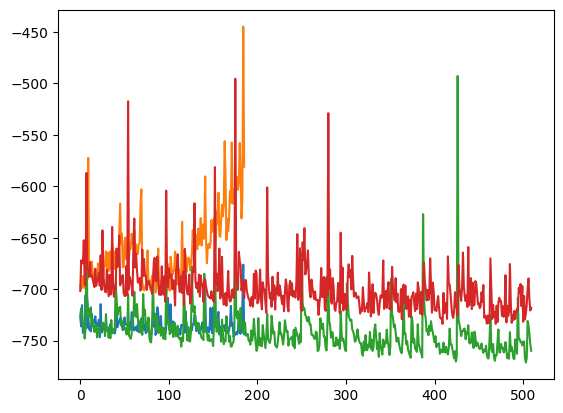

In [9]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()

vi.save()


In [10]:
vi.load()
vi.update_mulogvar_offlinedata()

load vi_base_ckpt


0  c = 0.20021770810986864
1  c = 0.1983582812192558
2  c = 0.022555950291700478
3  c = 0.20541677419620874
4  c = 0.10100278390403257
5  c = 0.18626578567738697
6  c = 0.05051976271514567
7  c = 0.047219332290270255
8  c = 0.1703964189334006
9  c = 0.14840815680292022
10  c = 0.24494872822400177
11  c = 0.025342155733352467
12  c = 0.29120495159551035
13  c = 0.1062823595846313
14  c = 0.2005682341251094
15  c = 0.2575002131665844
16  c = 0.2478069086585581
17  c = 0.10556652164894924
18  c = 0.1263102409001565
19  c = 0.06421935796424785
20  c = 0.162199131307732
21  c = 0.2946662208960819
22  c = 0.07020726813281049
23  c = 0.15752760672287627
24  c = 0.08439030047625135
25  c = 0.07330712053657978
26  c = 0.1016651025954488
27  c = 0.006908891882512702
28  c = 0.1901597193331265
29  c = 0.1863173542495256
30  c = 0.15759887301895484
31  c = 0.0308689768266279
32  c = 0.24135050248338633
33  c = 0.2181328493603175
34  c = 0.10463073088503207
35  c = 0.04975650100345974
36  c = 0.179

predict diverge [ 10.74036884 774.70859349]
96  c = 0.03765543221993569
97  c = 0.1447889054074812
98  c = 0.03610528656962901
99  c = 0.2376621125429203
 
実環境方策rollout vs Sim環境方策rollout


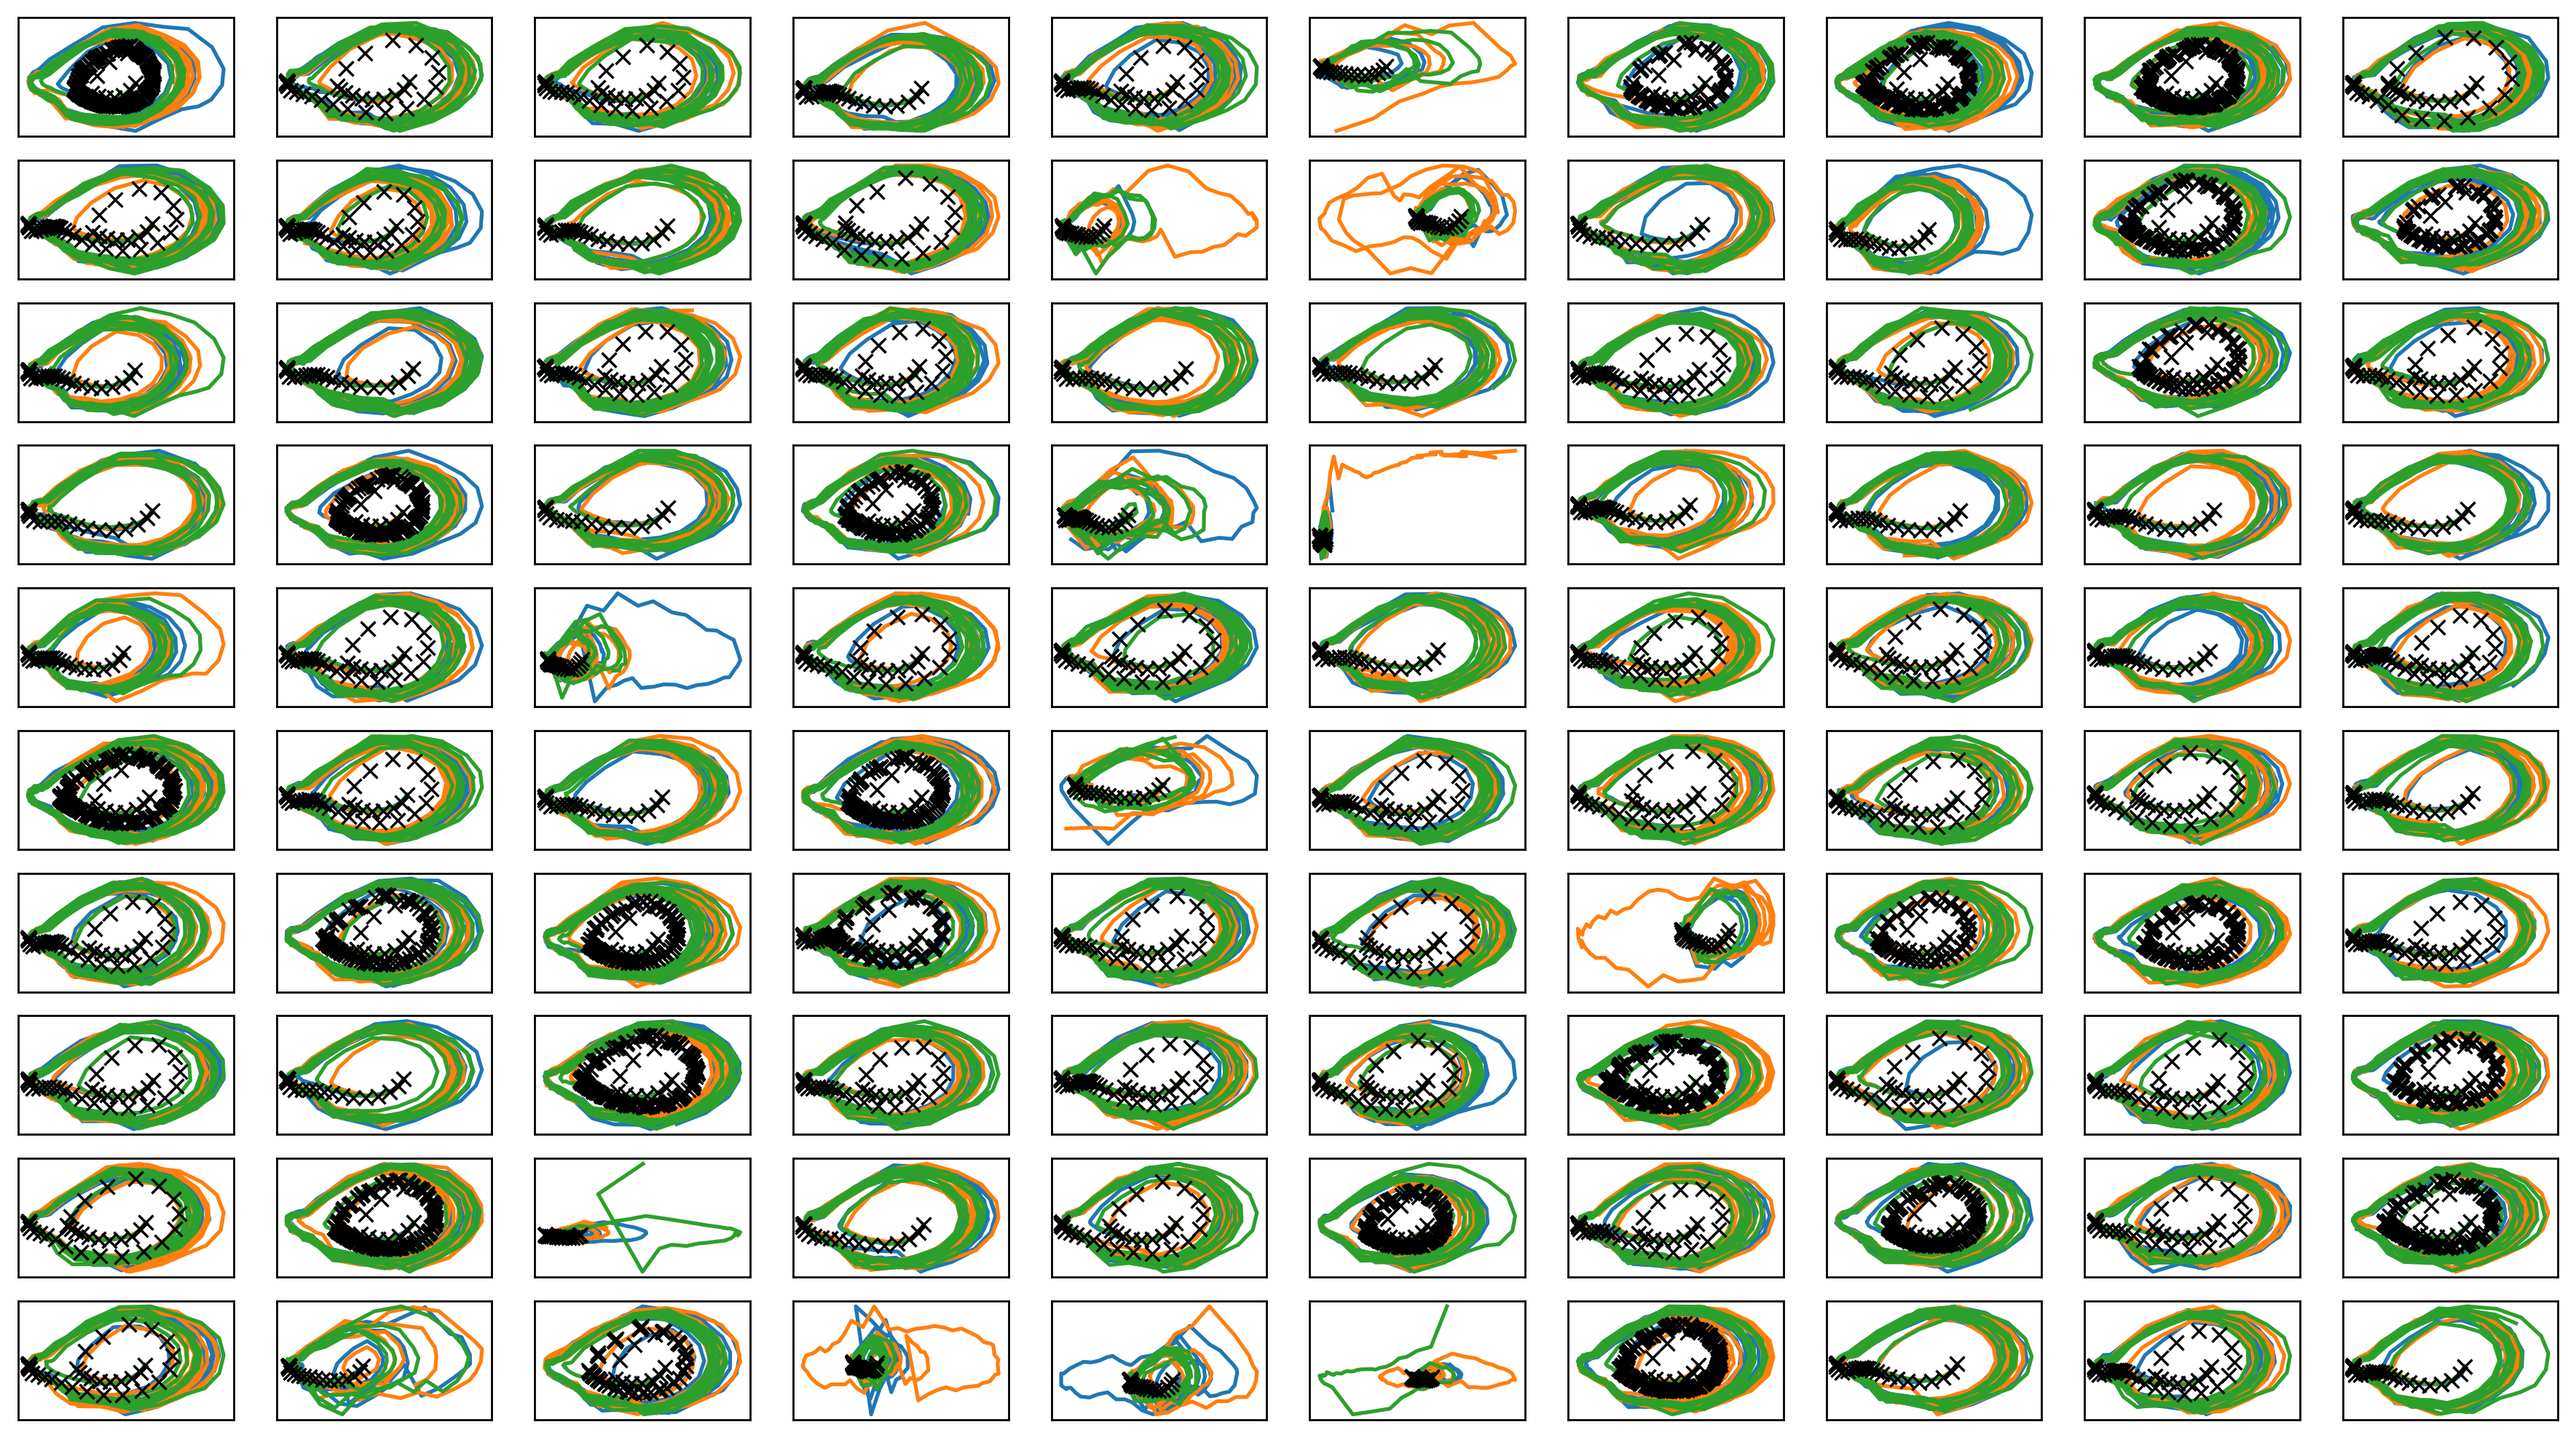

In [11]:
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig("fig_two_stage.png")
plt.savefig("fig_two_stage.eps")
plt.savefig("fig_two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

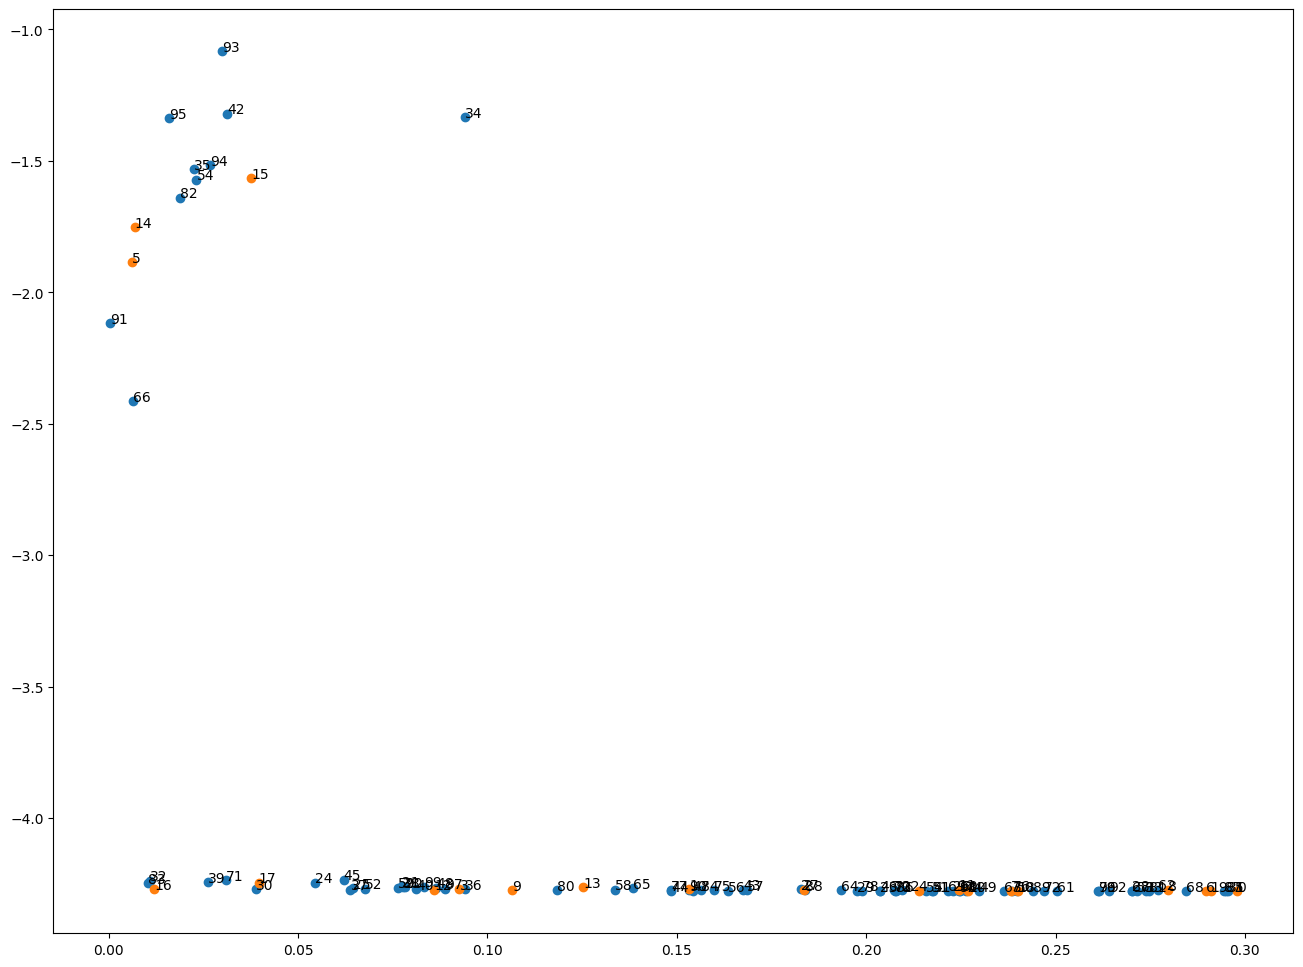

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


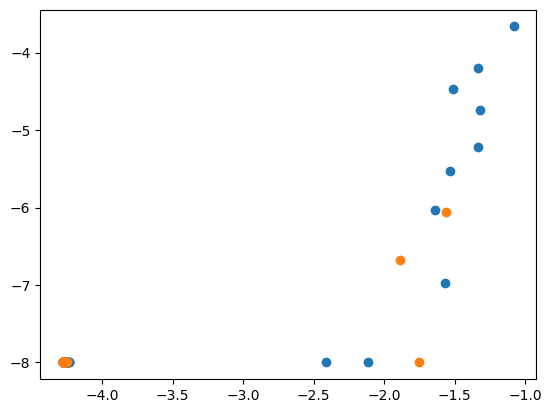

In [13]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [14]:
print(datetime.datetime.now())

2023-04-04 01:19:54.958161


In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 8.64317  validloss 8.87662±0.00000  bestvalidloss 8.87662  last_update 0
train: iter 1  trainloss 7.88502  validloss 8.08901±0.00000  bestvalidloss 8.08901  last_update 0
train: iter 2  trainloss 7.22819  validloss 7.41932±0.00000  bestvalidloss 7.41932  last_update 0
train: iter 3  trainloss 6.67540  validloss 6.80366±0.00000  bestvalidloss 6.80366  last_update 0
train: iter 4  trainloss 6.18358  validloss 6.27896±0.00000  bestvalidloss 6.27896  last_update 0
train: iter 5  trainloss 5.78257  validloss 5.87857±0.00000  bestvalidloss 5.87857  last_update 0
train: iter 6  trainloss 5.41269  validloss 5.47982±0.00000  bestvalidloss 5.47982  last_update 0
train: iter 7  trainloss 5.09435  validloss 5.14817±0.00000  bestvalidloss 5.14817  last_update 0
train: iter 8  trainloss 4.80044  validloss 4.85297±0.00000  bestvalidloss 4.85297  last_update 0
train: iter 9  trainloss 4.55009  validloss 4.60228±0.00000  bestvalidloss 4.60228  last_update 0
train: iter 10  trai

train: iter 83  trainloss 1.39006  validloss 1.38773±0.00000  bestvalidloss 1.38773  last_update 0
train: iter 84  trainloss 1.36680  validloss 1.39177±0.00000  bestvalidloss 1.38773  last_update 1
train: iter 85  trainloss 1.36882  validloss 1.36902±0.00000  bestvalidloss 1.36902  last_update 0
train: iter 86  trainloss 1.35838  validloss 1.36252±0.00000  bestvalidloss 1.36252  last_update 0
train: iter 87  trainloss 1.36210  validloss 1.36502±0.00000  bestvalidloss 1.36252  last_update 1
train: iter 88  trainloss 1.35329  validloss 1.36366±0.00000  bestvalidloss 1.36252  last_update 2
train: iter 89  trainloss 1.36045  validloss 1.35462±0.00000  bestvalidloss 1.35462  last_update 0
train: iter 90  trainloss 1.34522  validloss 1.34780±0.00000  bestvalidloss 1.34780  last_update 0
train: iter 91  trainloss 1.34507  validloss 1.34723±0.00000  bestvalidloss 1.34723  last_update 0
train: iter 92  trainloss 1.34315  validloss 1.34157±0.00000  bestvalidloss 1.34157  last_update 0
train: ite

train: iter 165  trainloss 1.30627  validloss 1.30982±0.00000  bestvalidloss 1.30785  last_update 12
train: iter 166  trainloss 1.31560  validloss 1.32081±0.00000  bestvalidloss 1.30785  last_update 13
train: iter 167  trainloss 1.32150  validloss 1.31962±0.00000  bestvalidloss 1.30785  last_update 14
train: iter 168  trainloss 1.29763  validloss 1.31772±0.00000  bestvalidloss 1.30785  last_update 15
train: iter 169  trainloss 1.30604  validloss 1.33420±0.00000  bestvalidloss 1.30785  last_update 16
train: iter 170  trainloss 1.30633  validloss 1.34445±0.00000  bestvalidloss 1.30785  last_update 17
train: iter 171  trainloss 1.31580  validloss 1.33859±0.00000  bestvalidloss 1.30785  last_update 18
train: iter 172  trainloss 1.32748  validloss 1.31633±0.00000  bestvalidloss 1.30785  last_update 19
train: iter 173  trainloss 1.33173  validloss 1.32312±0.00000  bestvalidloss 1.30785  last_update 20
train: iter 174  trainloss 1.33394  validloss 1.32653±0.00000  bestvalidloss 1.30785  last_

train: iter 257  trainloss 1.31932  validloss 1.32488±0.00000  bestvalidloss 1.29332  last_update 51
train: iter 258  trainloss 1.30814  validloss 1.33510±0.00000  bestvalidloss 1.29332  last_update 52
train: iter 259  trainloss 1.32107  validloss 1.32738±0.00000  bestvalidloss 1.29332  last_update 53
train: iter 260  trainloss 1.31501  validloss 1.32327±0.00000  bestvalidloss 1.29332  last_update 54
train: iter 261  trainloss 1.31452  validloss 1.30495±0.00000  bestvalidloss 1.29332  last_update 55
train: iter 262  trainloss 1.32251  validloss 1.32865±0.00000  bestvalidloss 1.29332  last_update 56
train: iter 263  trainloss 1.30997  validloss 1.33041±0.00000  bestvalidloss 1.29332  last_update 57
train: iter 264  trainloss 1.30838  validloss 1.31648±0.00000  bestvalidloss 1.29332  last_update 58
train: iter 265  trainloss 1.31555  validloss 1.33434±0.00000  bestvalidloss 1.29332  last_update 59
train: iter 266  trainloss 1.30913  validloss 1.32117±0.00000  bestvalidloss 1.29332  last_

In [16]:
print(vi.initial_belief)
vi.save()

Parameter containing:
tensor([-3.9367, -0.2121], requires_grad=True)


In [17]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100)

train: iter 0  trainloss 15.03426  validloss 18.40598±0.00000  bestvalidloss 18.40598  last_update 0
train: iter 1  trainloss 7.91633  validloss 10.34195±0.00000  bestvalidloss 10.34195  last_update 0
train: iter 2  trainloss 4.72123  validloss 5.63500±0.00000  bestvalidloss 5.63500  last_update 0
train: iter 3  trainloss 3.50223  validloss 4.10166±0.00000  bestvalidloss 4.10166  last_update 0
train: iter 4  trainloss 2.98559  validloss 3.92147±0.00000  bestvalidloss 3.92147  last_update 0
train: iter 5  trainloss 2.75900  validloss 3.59803±0.00000  bestvalidloss 3.59803  last_update 0
train: iter 6  trainloss 2.52229  validloss 3.24434±0.00000  bestvalidloss 3.24434  last_update 0
train: iter 7  trainloss 2.34599  validloss 3.18530±0.00000  bestvalidloss 3.18530  last_update 0
train: iter 8  trainloss 2.28725  validloss 3.14505±0.00000  bestvalidloss 3.14505  last_update 0
train: iter 9  trainloss 2.05925  validloss 3.03926±0.00000  bestvalidloss 3.03926  last_update 0
train: iter 10 

train: iter 83  trainloss 1.25945  validloss 2.14646±0.00000  bestvalidloss 1.99781  last_update 16
train: iter 84  trainloss 1.24188  validloss 2.07354±0.00000  bestvalidloss 1.99781  last_update 17
train: iter 85  trainloss 1.28696  validloss 2.13415±0.00000  bestvalidloss 1.99781  last_update 18
train: iter 86  trainloss 1.24706  validloss 2.09288±0.00000  bestvalidloss 1.99781  last_update 19
train: iter 87  trainloss 1.27438  validloss 2.16870±0.00000  bestvalidloss 1.99781  last_update 20
train: iter 88  trainloss 1.26094  validloss 2.17561±0.00000  bestvalidloss 1.99781  last_update 21
train: iter 89  trainloss 1.26499  validloss 2.29489±0.00000  bestvalidloss 1.99781  last_update 22
train: iter 90  trainloss 1.29590  validloss 2.09605±0.00000  bestvalidloss 1.99781  last_update 23
train: iter 91  trainloss 1.29951  validloss 2.10366±0.00000  bestvalidloss 1.99781  last_update 24
train: iter 92  trainloss 1.28803  validloss 2.12259±0.00000  bestvalidloss 1.99781  last_update 25


train: iter 165  trainloss 1.24205  validloss 2.16208±0.00000  bestvalidloss 1.99781  last_update 98
train: iter 166  trainloss 1.33946  validloss 2.11589±0.00000  bestvalidloss 1.99781  last_update 99
train: iter 167  trainloss 1.24642  validloss 2.24290±0.00000  bestvalidloss 1.99781  last_update 100
train: fin


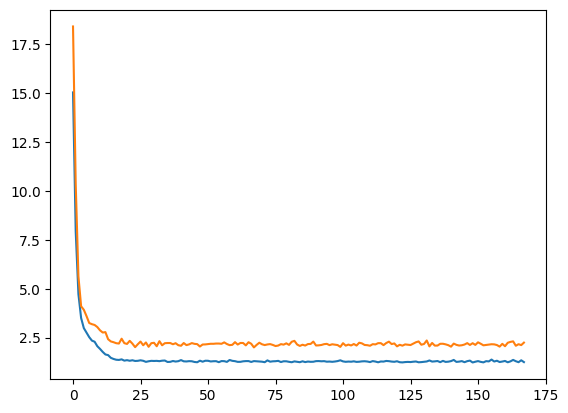

In [18]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [19]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

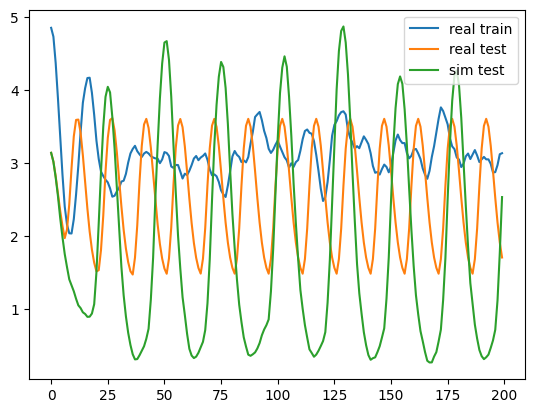

encoder [-4.277834 -8.      ]
initial_belief tensor([-3.9367, -0.2121])
real train tensor([-4.2673, -8.0108])
real test tensor([-4.2505, -8.0039])
sim tensor([-4.2736, -8.0000])


In [20]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-4.26530612244898


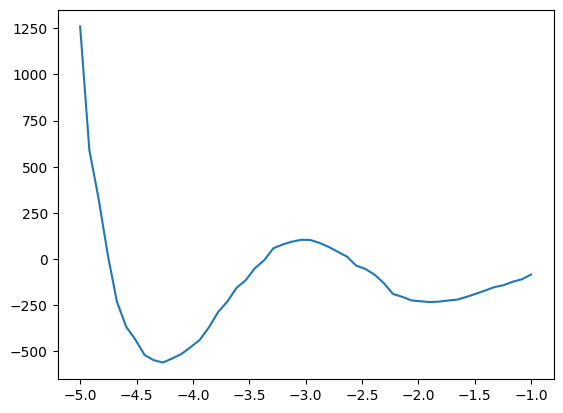

In [21]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])